In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple
import warnings

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

pd.set_option("display.float", "{:.2f}".format)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# Reading the data:
df = pd.read_csv(r'C:\Users\moham\Desktop\thesis\thesis\data\data.csv')

# Getting samples from first stage only
ind = np.logical_and(df.segStageI_index > 0, df.segStageI_index <= 1) 
df = df.loc[ind, :]

# Dropping unused columns:
df = df.drop(['name', 'year', 'segStart_samp', 'segEnd_samp', 'segIndex', 'segStage', 'segStageI_index', 'segStageII_index'], axis=1)

# Dropping missing Values:
df = df.dropna()

# Target Vector:
df['pH'] = (df.pH <= 7.05).astype(int).ravel()

# Feature and target vectors:
y = df['pH'] # target
X = df.drop(['pH'], axis=1) # Feature matrix

# splitting the data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# Dataframe
df.head()

,pH,mean,std,median,mad,skewness,kurtosis,bslnMean,bslnSD,stressRatio,...,MF_c1,MF_c2,MF_c3,MF_c4,H310,H29,MF_c1_29,MF_c2_29,MF_c3_29,MF_c4_29
13,0,136.04,34.24,144.25,30.63,-0.30,1.68,172.14,0.46,0.80,...,1.54,-0.32,-0.07,0.44,0.25,0.32,1.56,-0.24,-0.07,0.19
46,0,147.07,12.86,145.75,10.41,0.04,2.71,150.48,2.45,0.33,...,1.53,-0.00,0.01,-0.06,0.48,0.53,1.56,0.01,-0.00,-0.06
64,0,129.86,16.68,134.00,12.35,-0.76,4.22,137.21,1.20,0.29,...,1.51,-0.03,-0.04,-0.14,0.43,0.46,1.53,-0.01,-0.03,-0.14
78,0,117.75,19.36,119.25,12.14,-0.36,7.59,121.91,1.20,0.35,...,1.60,-0.26,-0.23,-0.06,0.19,0.30,1.62,-0.22,-0.13,-0.09
90,0,140.78,7.38,141.50,5.41,-1.31,9.28,144.04,0.72,0.13,...,1.42,-0.12,-0.01,-0.03,0.25,0.36,1.49,-0.10,0.03,-0.19


In [3]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('feature_reduction', PCA(svd_solver='auto')),
    ('clf', LogisticRegression(random_state=1, n_jobs=-1, class_weight='balanced'))
]
               )

In [4]:
param_grid = {
    'feature_reduction__n_components': [5, 6, 7, 8, 9],
    'clf__penalty': ['l1', 'l2'],
    'clf__C': 10.**np.arange(-6,0),
}

In [5]:
grid = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, verbose=1, scoring='roc_auc').fit(X_train, y_train) #used the whole data

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 303 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 593 out of 600 | elapsed:   16.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   16.9s finished


In [6]:
print("Best parameter of (CV score = %0.3f) (AUC) :" % grid.best_score_)
print(grid.best_params_)

Best parameter of (CV score = 0.606) (AUC) :
{'clf__C': 0.1, 'clf__penalty': 'l2', 'feature_reduction__n_components': 8}


In [7]:
CVresults = pd.DataFrame(grid.cv_results_);CVresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__penalty,param_feature_reduction__n_components,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.06,0.02,0.00,0.00,0.00,l1,5,"{'clf__C': 1e-06, 'clf__penalty': 'l1', 'featu...",0.50,0.50,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
1,0.06,0.01,0.01,0.00,0.00,l1,6,"{'clf__C': 1e-06, 'clf__penalty': 'l1', 'featu...",0.50,0.50,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
2,0.10,0.02,0.00,0.00,0.00,l1,7,"{'clf__C': 1e-06, 'clf__penalty': 'l1', 'featu...",0.50,0.50,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
3,0.13,0.03,0.01,0.00,0.00,l1,8,"{'clf__C': 1e-06, 'clf__penalty': 'l1', 'featu...",0.50,0.50,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
4,0.14,0.04,0.01,0.00,0.00,l1,9,"{'clf__C': 1e-06, 'clf__penalty': 'l1', 'featu...",0.50,0.50,...,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.00
5,0.11,0.03,0.01,0.00,0.00,l2,5,"{'clf__C': 1e-06, 'clf__penalty': 'l2', 'featu...",0.77,0.59,...,0.62,0.62,0.60,0.61,0.60,0.62,0.61,0.62,0.61,0.01
6,0.08,0.01,0.01,0.00,0.00,l2,6,"{'clf__C': 1e-06, 'clf__penalty': 'l2', 'featu...",0.77,0.59,...,0.63,0.62,0.60,0.62,0.60,0.62,0.61,0.62,0.61,0.01
7,0.06,0.01,0.01,0.00,0.00,l2,7,"{'clf__C': 1e-06, 'clf__penalty': 'l2', 'featu...",0.81,0.61,...,0.64,0.63,0.62,0.62,0.60,0.63,0.63,0.64,0.62,0.01
8,0.06,0.01,0.00,0.00,0.00,l2,8,"{'clf__C': 1e-06, 'clf__penalty': 'l2', 'featu...",0.81,0.61,...,0.64,0.63,0.62,0.63,0.60,0.63,0.63,0.64,0.63,0.01
9,0.06,0.01,0.00,0.00,0.00,l2,9,"{'clf__C': 1e-06, 'clf__penalty': 'l2', 'featu...",0.81,0.62,...,0.64,0.64,0.62,0.63,0.61,0.64,0.63,0.64,0.63,0.01


#### Validation curve

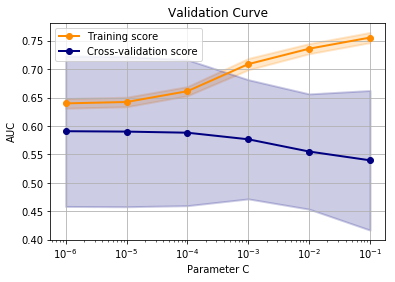

In [8]:
c_range = 10.**np.arange(-6,0)
train_scores, test_scores = validation_curve(estimator=pipe, X=X_train, y=y_train, scoring='roc_auc', param_name='clf__C', param_range= c_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
lw = 2
plt.semilogx(c_range, train_mean, label="Training score",
             color="darkorange", lw=lw, marker='o')
plt.fill_between(c_range, train_mean - train_std,
                 train_mean + train_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(c_range, test_mean, label="Cross-validation score",
             color="navy", lw=lw, marker='o')
plt.fill_between(c_range, test_mean - test_std,
                 test_mean + test_std, alpha=0.2,
                 color="navy", lw=lw)
plt.xlabel('Parameter C')
plt.ylabel('AUC')
plt.legend(loc="best")
plt.title('Validation Curve')
plt.grid()
plt.show()


### ROC curve

In [9]:
best_clf = grid.best_estimator_

In [10]:
y_proba = best_clf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)

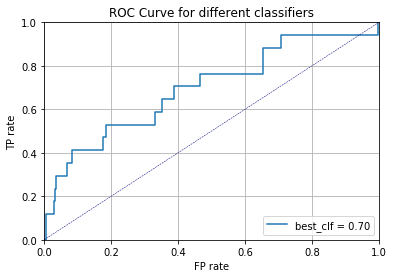

In [11]:
plt.plot(fpr, tpr, label='best_clf = %0.2f' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for different classifiers')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.grid(True)